# Credit Card Fraud Detection

<hr>

### Algorithm used:

- Isolation Forest Algorithm `Ensemble`
- Local Outlier Factor Algorithm `Neighbors`
<hr>

### Dataset used:

- CreditCard dataset from Kaggle.

<hr>


**Importing chainey kura haru**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as pyplot
import scipy

In [21]:
credit_card_full_data = pd.read_csv("../input/creditcard.csv")

**Just to make it fast, 0.1 fraction mattra leko**
- Also to make sure we are getting the same data always we are using `random_state = 1`

In [32]:
credit_card_data = credit_card_full_data.sample(frac=0.1, random_state=1)

**Histogram haru banai herrum**

In [44]:
# credit_card_data.hist(figsize=(20,20))
# pyplot.show()

**Hereko kati wota fraud cha , k kaso cha !!**

In [46]:
fraud_transactions = credit_card_data[credit_card_data.Class == 1]
valid_transactions = credit_card_data[credit_card_data.Class == 0]

fraction = len(fraud_transactions) / float(len(valid_transactions))

**Corelation Matrix ko kura**
- Variables Haru Bich kati k relation cha. 
- Tyai lai graph ma represent ni gareko.

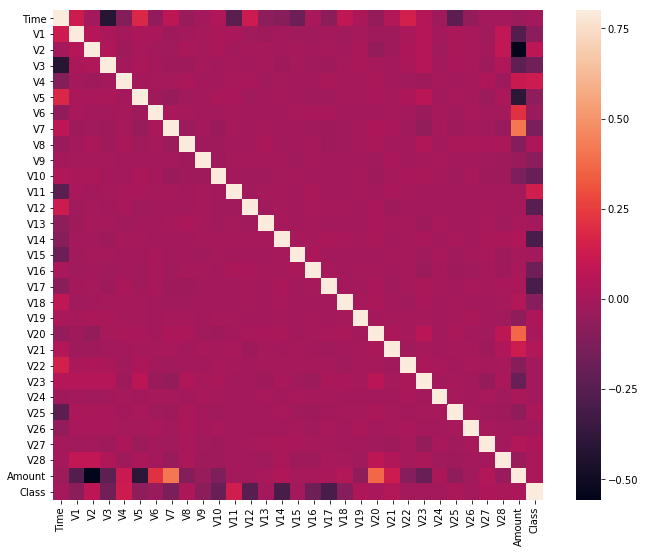

In [50]:
corelated_data = credit_card_data.corr()
figure = pyplot.figure(figsize=(12,9))
sbn.heatmap(corelated_data, vmax=.8, square=True)
pyplot.show()

**Since this is UNSUPERVISED**
- Remove class label from the dataset. 
- Input ra output ma divide garryo. `Input class bahek sappai huncha, output class matra huncha.`


In [54]:
columns = credit_card_data.columns.tolist()

input_columns = [column for column in columns if column not in ["Class"]]
output_columns = "Class"

input_data = credit_card_data[input_columns]
output_data = credit_card_data[output_columns]

In [62]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [58]:
state = 1
classifiers = {
    "Isolation Forest":
    IsolationForest(
        max_samples=len(input_data),
        contamination=fraction,
        random_state=state),
    "Local Outlier Factor":
    LocalOutlierFactor(
        n_neighbors=20, contamination=fraction)
}

In [65]:
number_of_outliers = len(fraud_transactions)
for i, (classifier_name, classifier_object) in enumerate(classifiers.items()):
    if classifier_name == "Local Outlier Factor":
        predictions = classifier_object.fit_predict(input_data)
        scores_prediction = classifier_object.negative_outlier_factor_
    else:
        classifier_object.fit(input_data)
        predictions = classifier_object.predict(input_data)
        score_predictions = classifier_object.decision_function(input_data)

    # The predictions will output -1 and 1 so , remaking them to 0 as valid and 1 as fraud ...
    predictions[predictions == 1] = 0
    predictions[predictions == -1] = 1
    
    errors = (predictions != output_data).sum()
    
    accuracy = accuracy_score(output_data, predictions)
    
    print("Errors : {}".format(errors))
    print("Accuracy : {}".format(accuracy))
    print(classification_report(output_data, predictions))

C:\Users\Pramesh\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Errors : 71
Accuracy : 0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Errors : 97
Accuracy : 0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

